# Домашнее задание №2

Задание присылать на почту aleksartamonov@gmail.com в виде ссылки на colab

В теме письма указать **CV_PANDAN_2021 HW2 <Фамилия Имя>**

soft deadline: 08.03.2021T23:59:00+0300

hard deadline: 14.03.2021T23:59:00+0300

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive/pandan-cv-course/practice

In [3]:
import cv2
import matplotlib.pylab as plt
import numpy as np
from ipywidgets import interact, widgets

%matplotlib inline
plt.style.use('default')

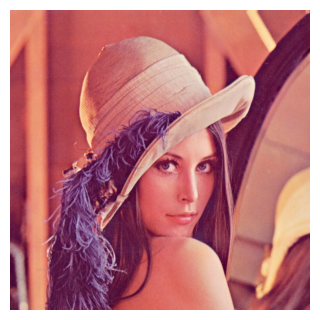

In [4]:
def show(img, size=3):
    plt.figure(figsize=(size, size))
    ax = plt.axes([0, 0, 1, 1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def show_gray(img, size=3):
    plt.figure(figsize=(size, size))
    ax = plt.axes([0, 0, 1, 1], frameon=False)
    ax.set_axis_off()
    plt.imshow(img, cmap="gray")

lena = cv2.imread("lena.jpg")
show(lena)


**1. (5 баллов)** С помощью [виджетов](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. 

In [5]:
def grid(array, ncols=3):  
    # https://stackoverflow.com/questions/42040747/more-idiomatic-way-to-display-images-in-a-grid-with-numpy
    nindex, height, width, intensity = array.shape
    nrows = nindex // ncols
    return (array.reshape(nrows, ncols, height, width, intensity).swapaxes(1,2).reshape(height*nrows, width*ncols, intensity))

def to_plot_gamma(c, gamma, grid_size=50):
    x = np.linspace(0, 1, grid_size)
    y = c * x.astype(float) ** gamma
    return x, y

def gamma_cor(X, c, gamma):
    return (c * (X.astype(float) / 255) ** gamma * 255).astype(np.uint8)

def lena_cor_widget(c, gamma):
    gamma_lena = gamma_cor(lena, c, gamma)
    
    # show(gamma_lena)

    # imgs = np.array([lena, gamma_lena])
    # show(grid(imgs, ncols=2))

    fig, ax = plt.subplots(1, 3, figsize=(20, 8))
    # Original Lena
    # ax[0].axes([0,0,1,1], frameon=False)
    ax[0].set_axis_off()
    ax[0].imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))

    # Gamma-corrected Lena
    # ax[1].axes([0,0,1,1], frameon=False)
    ax[1].set_axis_off()
    ax[1].imshow(cv2.cvtColor(gamma_lena, cv2.COLOR_BGR2RGB))

    # Gamma plot
    x, y = to_plot_gamma(c, gamma)
    ax[2].plot(x, y)
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("$y = c\cdot x^{\\gamma}$")

    plt.show()

In [6]:
interact(lena_cor_widget, c=widgets.FloatSlider(min=0., max=1., step=0.01, value=1.), gamma=widgets.FloatSlider(min=0., max=5., step=0.01, value=1.))

interactive(children=(FloatSlider(value=1.0, description='c', max=1.0, step=0.01), FloatSlider(value=1.0, desc…

<function __main__.lena_cor_widget(c, gamma)>

**2. (5 баллов)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

In [7]:
class Img:
    def __init__(self, img):
        self.img = img

    def gray(self):
        return Img(cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY))

    def norm(self):
        return Img(cv2.normalize(self.img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX))

    def equalized(self):
        return Img(cv2.equalizeHist(self.img))

In [8]:
def gray_grid(array, ncols=3):
    nindex, height, width = array.shape
    nrows = nindex // ncols
    return (array.reshape(nrows, ncols, height, width).swapaxes(1,2).reshape(height*nrows, width*ncols))

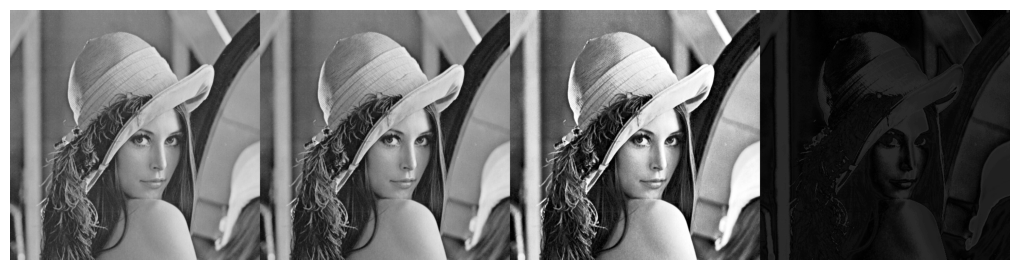

In [9]:
lena_gray = Img(lena).gray()
lena_norm = lena_gray.norm()
lena_eq = lena_gray.equalized()


lena_diff = np.abs(lena_norm.img.astype(float) - lena_eq.img.astype(float)).astype(np.uint8)

imgs = np.array([lena_gray.img, lena_norm.img, lena_eq.img, lena_diff])
show_gray(gray_grid(imgs, ncols=4), size=10)

**3. (5 баллов)** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [10]:
def salt_pepper(src, p, q):
    msk = np.random.uniform(0, 1, size=src.shape)
    out = src.copy()
    out[msk <= p] = 0
    out[msk >= 1 - q] = 255
    return out    

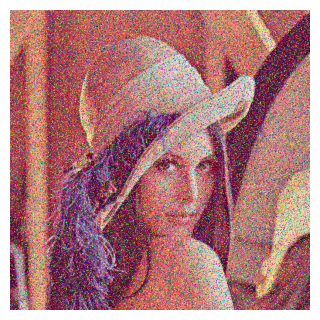

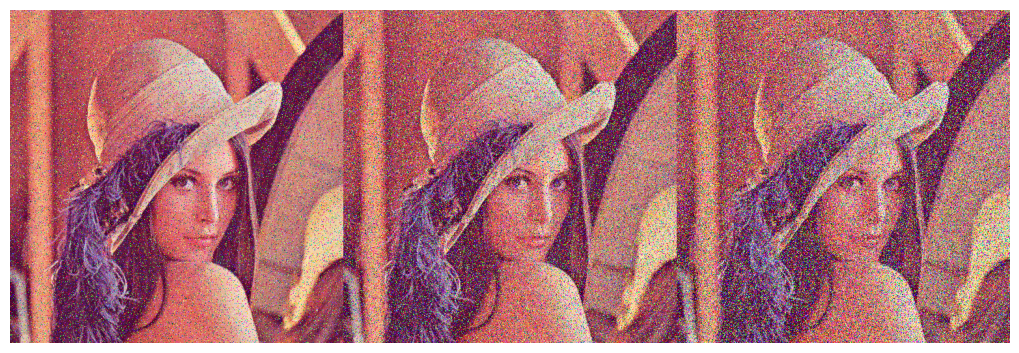

In [11]:
lena_ = np.zeros_like(lena)
lena_[..., 0] = salt_pepper(lena[..., 0], p=0.05, q=0.05)
lena_[..., 1] = salt_pepper(lena[..., 1], p=0.1, q=0.1)
lena_[..., 2] = salt_pepper(lena[..., 2], p=0.15, q=0.15)
show(lena_)

imgs = np.array([salt_pepper(lena, p=0.05, q=0.05), salt_pepper(lena, p=0.1, q=0.1), salt_pepper(lena, p=0.15, q=0.15)])
show(grid(imgs), size=10)

**4. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

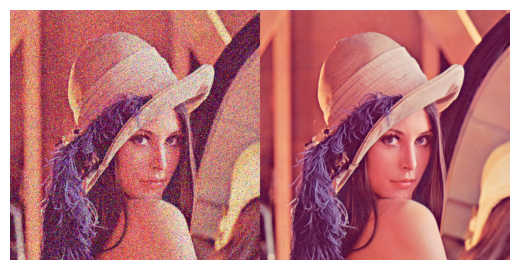

In [12]:
lena_noised = cv2.imread("lena_color_512-noise.tif")
lena_target = cv2.imread("lena_color_512.tif")
show(grid(np.array([lena_noised, lena_target]), 2), size=5)

In [13]:
def mse(inp, target):
    return ((inp.astype(float) - target.astype(float)) ** 2).mean()

def experiment(img, target, lower=150, upper=255, size=5, cv2blur="blur"):
    img_ = img.astype(float)

    if cv2blur == "blur":
        out = cv2.blur(img, (size, size))
    elif cv2blur == "medianBlur":
        out = cv2.medianBlur(img, size)
    elif cv2blur == "GaussianBlur":
        out = cv2.GaussianBlur(img, (size, size), 0)
    elif cv2blur == "bilateralFilter":
        out = cv2.bilateralFilter(img, 9, 75, 75)

    out = out.astype(float)
    
    diff = np.abs(img_ - out)
    
    msk = (diff >= lower) & (diff <= upper)
    out[msk] += diff[msk]

    # out[msk] = img[msk].astype(float)
    
    out = np.clip(out, 0, 255)

    return out.astype(np.uint8)

In [14]:
img = experiment(lena_noised, lena_target, cv2blur="bilateralFilter")
print(f"mse = {mse(img, lena_target)}")

mse = 902.1930287679037


In [15]:
# best_mse = 1e8
# for blur in ("medianBlur",):
#     for size in range(3, 9, 2):
#         for low in range(200, 256):
#             for up in range(low + 1, 256):
#                 img = experiment(lena_noised, lena_target, size=size, lower=low, upper=up, cv2blur=blur)
#                 mse_ = mse(img, lena_target)
#                 if mse_ < best_mse:
#                     best_mse = mse_
#                     best_params = {
#                         "blur": blur,
#                         "size": size,
#                         "low": low,
#                         "up": up,
#                         "mse": best_mse
#                     }

In [16]:
# print(best_params)

In [17]:
img = experiment(lena_noised, lena_target, size=7, lower=253, upper=254, cv2blur="medianBlur")
print(mse(img, lena_target))

158.2946459452311


**5. (5 баллов)** Выделите в изображении $table.jpg$ границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором удален весь текст и оставлены только границы таблицы

In [18]:
class ImgMorph:
    def __init__(self, img, gray_scaled=False):
        self.img = img
        self.gray_scaled = gray_scaled

    def gray(self):
        return ImgMorph(cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY), gray_scaled=True)

    def norm(self):
        return ImgMorph(cv2.normalize(self.img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX), gray_scaled=self.gray_scaled)

    def equalized(self):
        return ImgMorph(cv2.equalizeHist(self.img), gray_scaled=self.gray_scaled)

    def threshold(self, t=0, upper=255, kind="0"):
        if kind == "0":
            c = 0
        elif kind.upper() == "THRESH_BINARY_INV":
            c = cv2.THRESH_BINARY_INV
        return ImgMorph(cv2.threshold(self.img, t, upper, c)[1], gray_scaled=self.gray_scaled)

    def opening(self, kernel):
        return ImgMorph(cv2.morphologyEx(self.img, cv2.MORPH_OPEN, kernel), gray_scaled=self.gray_scaled)

    def closing(self, kernel):
        return ImgMorph(cv2.morphologyEx(self.img, cv2.MORPH_CLOSE, kernel), gray_scaled=self.gray_scaled)

    def find_contours(self):
        return cv2.findContours(self.img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    def dilate(self, kernel):
        return ImgMorph(cv2.dilate(self.img, kernel, 0), gray_scaled=self.gray_scaled)

    @property
    def picture(self):
        self.show_picture(size=5)

    def show_picture(self, size):
        plt.figure(figsize=(size, size))
        ax = plt.axes([0, 0, 1, 1], frameon=False)
        ax.set_axis_off()
        if self.gray_scaled:
            plt.imshow(self.img, cmap="gray")
        else:
            plt.imshow(cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB))
    
    def __add__(self, other):
        return ImgMorph((np.logical_or(self.img, other.img) * 255).astype(np.uint8))

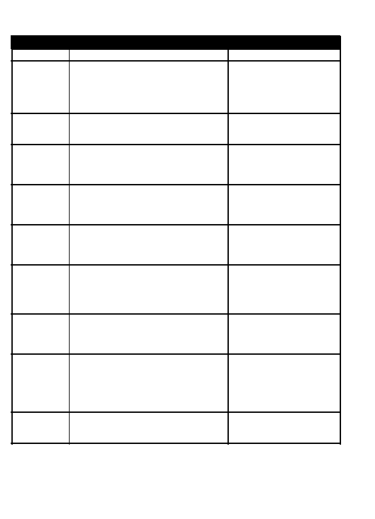

In [19]:
table = ImgMorph(cv2.imread("table.jpg"))
# table.picture

kernel = np.ones((2, 2), np.uint8)
clean_header = table.opening(kernel)
# clean_header.picture

kernel_v = np.ones((8, 1), np.uint8)
vertical_part = clean_header.closing(kernel_v)
# vertical_part.picture

kernel = np.ones((2, 3), np.uint8)
horizontal_part = table.closing(kernel)
# horizontal_part.picture


table_corpse = (vertical_part.threshold(t=128, kind="THRESH_BINARY_INV") 
                + horizontal_part.threshold(t=128, kind="THRESH_BINARY_INV")).threshold(t=128, kind="THRESH_BINARY_INV")
table_corpse.picture

**6. (5 баллов)** Отделите монеты от фона на изображении $coins\_1.jpg$, отсортируйте монеты по убыванию размера. Сгенерируйте результирующее изображение с цветной разметкой областей, соответствующих монетам на исходном изображении: на черном фоне должны быть выделены разными цветами области, соответствующие монетам. В центре каждой выделенной области разместите порядковый номер монеты в соответствии с сортировкой монет по размеру (в центре области, соответствующей самой большой монете, должно стоять число 1)

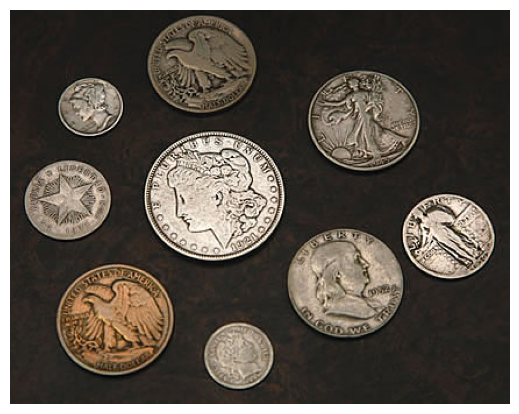

In [20]:
coins_1 = cv2.imread("coins_1.jpg")
coins = ImgMorph(coins_1)
coins.picture

<ipython-input-21-bca444fd5946>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cns = np.array(cns)


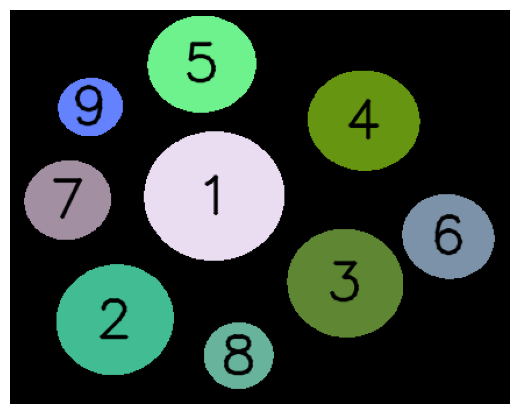

In [21]:
result = np.zeros_like(coins.img, dtype=np.uint8)

test = coins.gray().threshold(t=55)
contours, _ = test.find_contours()

cns = []
for cnt in contours:
    if len(cnt) > 75:
        cns.append(cv2.fitEllipse(cnt))
cns = np.array(cns)

# print(cns[0, 1])
# print(np.argsort(list(map(lambda x: np.prod(x),cns[:, 1]))))


cns = cns[np.argsort(list(map(lambda x: np.prod(x),cns[:, 1])))[::-1]]
for cnt in cns:
    color = map(int, np.random.randint(0, 255, 3))
    cv2.ellipse(result, tuple(cnt), tuple(color), -1)

for idx, cnt in enumerate(cns):
    cv2.putText(result, str(idx + 1), tuple(np.array(cnt[0]).astype(int) + [-15, 15]), 
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 2, cv2.LINE_AA)

show(result, size=5)

**7. (5 баллов)** Отделите монеты от текста на изображении $coins\_2.jpg.$ Сгенерируйте по входному изображению два изображения: на одном должны остаться только монеты, весь текст должен быть удален; на втором изображении должен остаться только текст, все монеты должны быть удалены.

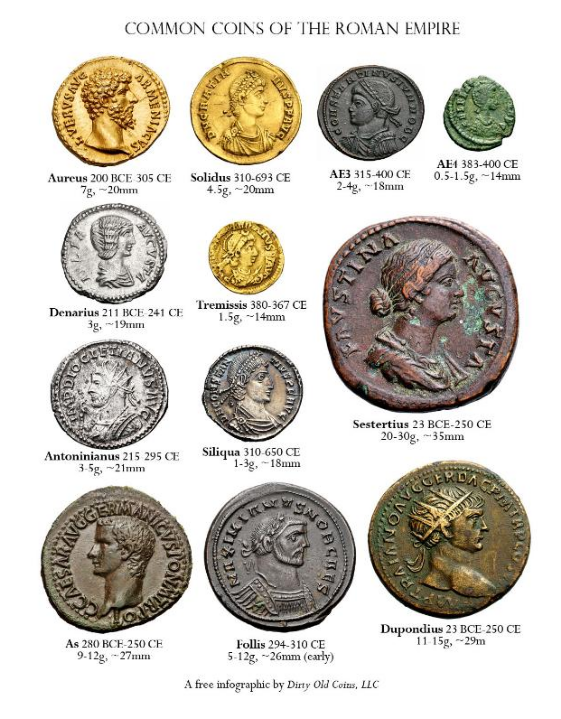

In [22]:
coins_2 = cv2.imread("coins_2.jpg")
coins = ImgMorph(coins_2)
coins.show_picture(7)

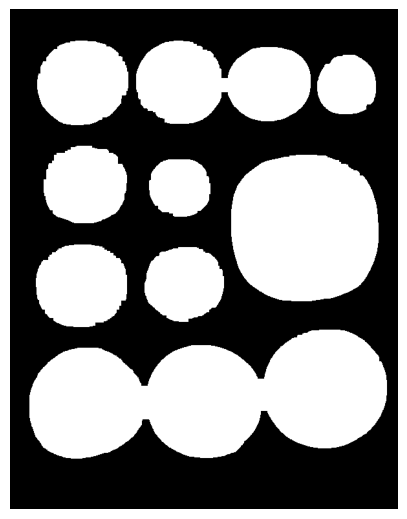

In [23]:
open_kernel = np.ones((5, 5), dtype=np.uint8)
close_kernel = np.ones((20, 20), dtype=np.uint8)
dilation_kernel = np.ones((9, 11), dtype=np.uint8)

# coins2 = coins.gray().threshold(upper=230).opening(open_kernel).closing(close_kernel).dilate(dilation_kernel)
coins2 = coins.gray().threshold(t=230).threshold(t=128, kind="THRESH_BINARY_INV").opening(open_kernel).closing(close_kernel).dilate(dilation_kernel)
coins2.picture

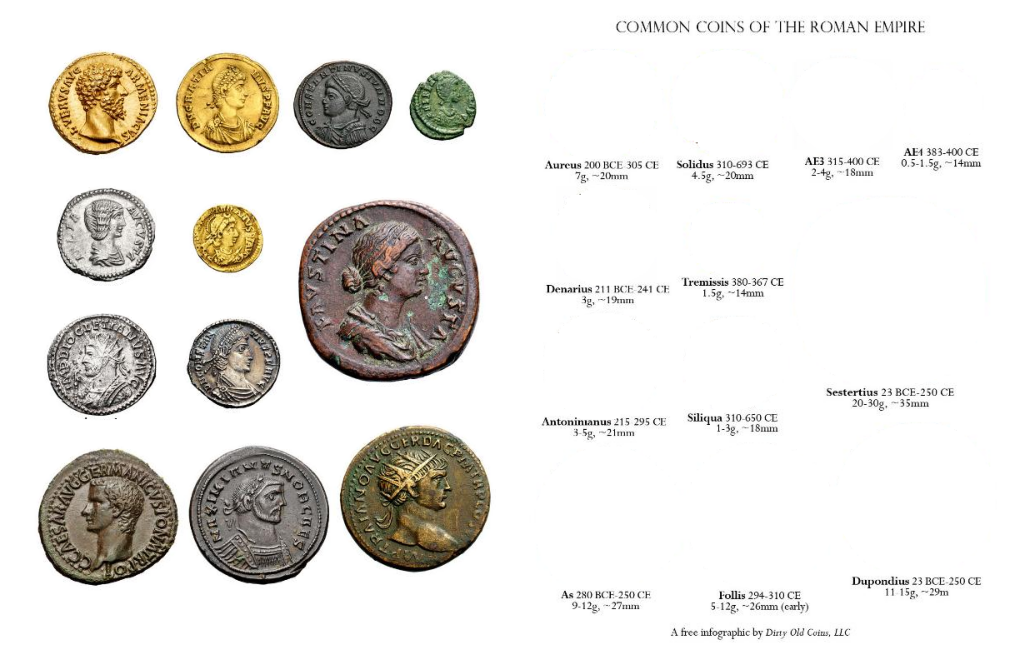

In [24]:
result_coins = coins.img.copy()
result_coins[coins2.img < 128] = 255

result_text = coins.img.copy()
result_text[coins2.img > 128] = 255

imgs = np.array([result_coins, result_text])

show(grid(imgs, 2), size=10)

**8. (10 баллов)** Посмотрите на изображения в папке *Coral*. Посчитайте гистограммы изображений. Выведите на экран 20 пар изображений с максимально похожими гистограммами. В этом задании надо попробовать:
* различные цветовые пространства (RGB, HSV, CIELab)
* различные способы разбиения на бины (разное количество для каждой характеристики)
* различные метрики сравнения $L_2$, $\chi^2$, пересечение гистограм

Приведите результат для лучшей комбинации признаков.